In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

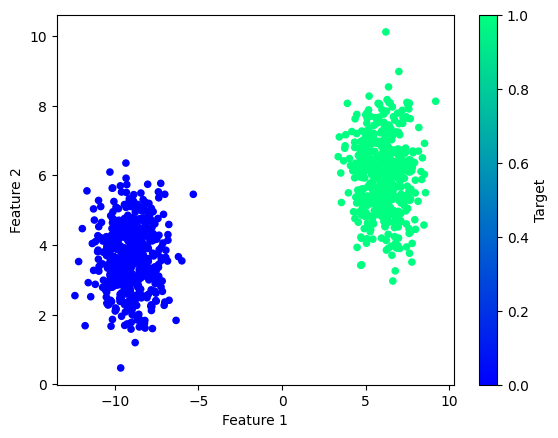

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-10-27 15:57:08.002824: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 15:57:08.003751: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


2022-10-27 16:23:51.379109: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 16:23:51.602814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 7ms/step - loss: 0.9012 - accuracy: 0.2813
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8741 - accuracy: 0.3067
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8497 - accuracy: 0.3240
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8283 - accuracy: 0.3520
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8089 - accuracy: 0.3853
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7928 - accuracy: 0.4040
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.4187
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.4347
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.4480
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7429 - accuracy: 0.4613
Epoch 11/100
24/24 [=

24/24 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.9240
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.9280
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2714 - accuracy: 0.9280
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.9293
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.9293
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.9320
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.9347
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.9373
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2431 - accuracy: 0.9427
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2385 - accuracy: 0.9453
Epoch 93/100


<AxesSubplot: >

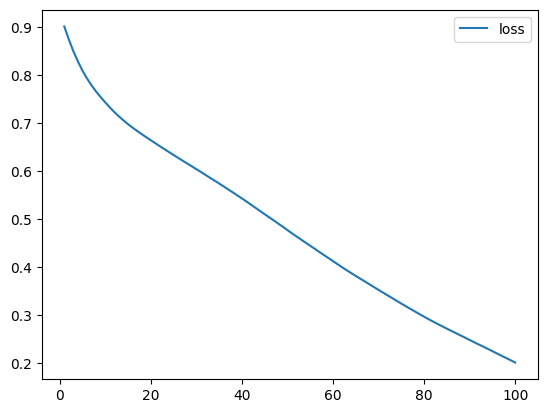

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

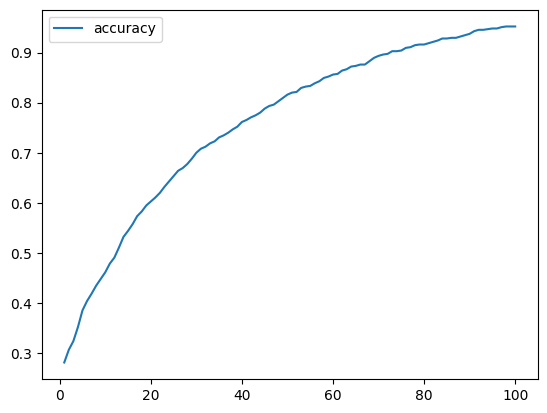

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1807 - accuracy: 0.9600 - 129ms/epoch - 16ms/step
Loss: 0.1807045340538025, Accuracy: 0.9600000381469727


2022-10-27 16:26:18.879075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
